ValueError: could not convert string to float: 'RL'

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/catal/OneDrive/Documents/upgrad assignments/train.csv'
data = pd.read_csv(file_path)

# Drop the first column as it is ignored
data = data.iloc[:, 1:]

# Separate independent variables (features) and dependent variable (target)
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append estimator to preprocessing pipeline
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('ridge', Ridge())])

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('lasso', Lasso())])

# Fit the model
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge_pipeline.predict(X_test)
y_pred_lasso = lasso_pipeline.predict(X_test)

# Evaluate model
print("Ridge Regression - RMSE on Test Set:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso Regression - RMSE on Test Set:", mean_squared_error(y_test, y_pred_lasso))


Ridge Regression - RMSE on Test Set: 891134061.4427361
Lasso Regression - RMSE on Test Set: 797650473.4579217


Ridge Regression - R-squared on Test Set: 0.8838205785032011
Lasso Regression - R-squared on Test Set: 0.8960082724108239
Ridge Regression - Adjusted R-squared on Test Set: 0.8405273035114693
Lasso Regression - Adjusted R-squared on Test Set: 0.857256638073348
Ridge Regression - RMSE on Test Set: 29851.86864239383
Lasso Regression - RMSE on Test Set: 28242.706553337302


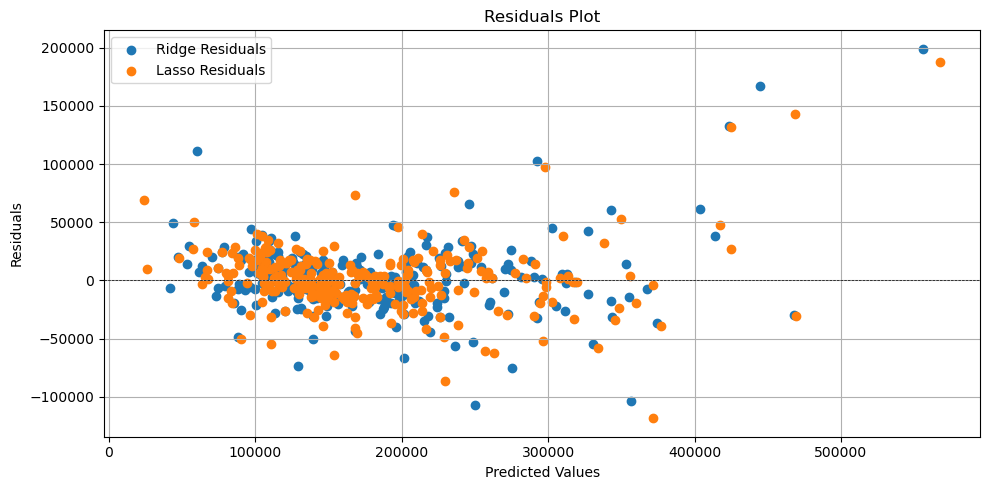

In [5]:
from sklearn.metrics import r2_score

# Calculate R-squared
ridge_r_squared = r2_score(y_test, y_pred_ridge)
lasso_r_squared = r2_score(y_test, y_pred_lasso)
print("Ridge Regression - R-squared on Test Set:", ridge_r_squared)
print("Lasso Regression - R-squared on Test Set:", lasso_r_squared)

# Calculate adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
ridge_adj_r_squared = 1 - (1 - ridge_r_squared) * ((n - 1) / (n - p - 1))
lasso_adj_r_squared = 1 - (1 - lasso_r_squared) * ((n - 1) / (n - p - 1))
print("Ridge Regression - Adjusted R-squared on Test Set:", ridge_adj_r_squared)
print("Lasso Regression - Adjusted R-squared on Test Set:", lasso_adj_r_squared)

# Other model diagnostics
ridge_residuals = y_test - y_pred_ridge
lasso_residuals = y_test - y_pred_lasso
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Ridge Regression - RMSE on Test Set:", ridge_rmse)
print("Lasso Regression - RMSE on Test Set:", lasso_rmse)

# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_ridge, ridge_residuals, label='Ridge Residuals')
plt.scatter(y_pred_lasso, lasso_residuals, label='Lasso Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
